### Understanding Problem Statement
- The Goal is to predict whether a person has an income of more than 50K a year or not.
This is basically a binary classification problem where a person is classified into the
> ">50K group or <=50K group."

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
df  = pd.read_csv('/workspaces/AdultCensusIncome/data/adult.csv')
df.head()
df.tail()

age     workclass  fnlwgt   education  education_num  \
32556   27       Private  257302  Assoc-acdm             12   
32557   40       Private  154374     HS-grad              9   
32558   58       Private  151910     HS-grad              9   
32559   22       Private  201490     HS-grad              9   
32560   52  Self-emp-inc  287927     HS-grad              9   

           marital_status         occupation relationship   race     sex  \
32556  Married-civ-spouse       Tech-support         Wife  White  Female   
32557  Married-civ-spouse  Machine-op-inspct      Husband  White    Male   
32558             Widowed       Adm-clerical    Unmarried  White  Female   
32559       Never-married       Adm-clerical    Own-child  White    Male   
32560  Married-civ-spouse    Exec-managerial         Wife  White  Female   

       capital_gain  capital_loss  hours_per_week        country salary  
32556             0             0              38  United-States  <=50K  
32557             0             0              40  United-States   >50K  
32558             0             0              40  United-States  <=50K  
32559             0             0              20  United-States  <=50K  
32560         15024             0              40  United-States   >50K

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  country         31978 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [4]:
for feature in df.columns:
    print(f"{feature} has {df[feature].unique()} unique values \n \n {('*')*120} \n")

age has [39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87] unique values 
 
 ************************************************************************************************************************ 

workclass has ['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' nan
 'Self-emp-inc' 'Without-pay' 'Never-worked'] unique values 
 
 ************************************************************************************************************************ 

fnlwgt has [ 77516  83311 215646 ...  34066  84661 257302] unique values 
 
 ************************************************************************************************************************ 

education has ['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'


 0   age             32561 non-null  int64  -> numerical, discrete
 1   workclass       32561 non-null  object -> categorical, nominal, Polytomous
 2   fnlwgt          32561 non-null  int64  -> numerical, discrete
 3   education       32561 non-null  object -> categorical, ordinal
 4   education_num   32561 non-null  int64  -> categorical, ordinal
 5   marital_status  32561 non-null  object -> categorical, nominal, polytomous
 6   occupation      32561 non-null  object -> categorical, nominal, polytomous 
 7   relationship    32561 non-null  object -> categorical, nominal, polytomous
 8   race            32561 non-null  object -> categorical, nominal, polytomous
 9   sex             32561 non-null  object -> categorical, nominal, dichotomous
 10  capital_gain    32561 non-null  int64  -> numerical, discrete
 11  capital_loss    32561 non-null  int64  -> numerical, discrete
 12  hours_per_week  32561 non-null  int64  -> numerical, discrete
 13  country         32561 non-null  object -> categorical, nominal, polytomous
 14  salary          32561 non-null  object -> categorical, nominal, dichotomous

- As education is already mapped with the education_num, hence dropping education column

In [5]:
edu_grouped = df[['education','education_num']].groupby('education_num')
edu_grouped.value_counts()

education_num  education   
1              Preschool          51
2              1st-4th           168
3              5th-6th           333
4              7th-8th           646
5              9th               514
6              10th              933
7              11th             1175
8              12th              433
9              HS-grad         10501
10             Some-college     7291
11             Assoc-voc        1382
12             Assoc-acdm       1067
13             Bachelors        5355
14             Masters          1723
15             Prof-school       576
16             Doctorate         413
dtype: int64

In [6]:
df.drop(['education'],axis=1,inplace=True)

### Handling Null Values
- columns country,occupation and workclass has "?" values

### Seperating Numerical and Categorical Variables

In [7]:
categorical_features = [feature for feature in df.columns if df[feature].dtypes == 'O']
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
numerical_df = df[numerical_features]
categorical_df = df[categorical_features]
from sklearn.impute import SimpleImputer
Numimputer = SimpleImputer(missing_values=np.nan, strategy='mean')
Catimputer = SimpleImputer(missing_values=np.nan,strategy='most_frequent')
Numimputer.fit_transform(numerical_df)
Catimputer.fit_transform(categorical_df)

array([['State-gov', 'Never-married', 'Adm-clerical', ..., 'Male',
        'United-States', '<=50K'],
       ['Self-emp-not-inc', 'Married-civ-spouse', 'Exec-managerial', ...,
        'Male', 'United-States', '<=50K'],
       ['Private', 'Divorced', 'Handlers-cleaners', ..., 'Male',
        'United-States', '<=50K'],
       ...,
       ['Private', 'Widowed', 'Adm-clerical', ..., 'Female',
        'United-States', '<=50K'],
       ['Private', 'Never-married', 'Adm-clerical', ..., 'Male',
        'United-States', '<=50K'],
       ['Self-emp-inc', 'Married-civ-spouse', 'Exec-managerial', ...,
        'Female', 'United-States', '>50K']], dtype=object)

- Checking distribution on numerical features

/tmp/ipykernel_12571/487052181.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=df[numerical_features[i]],shade=True, color='b')
/tmp/ipykernel_12571/487052181.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=df[numerical_features[i]],shade=True, color='b')
/tmp/ipykernel_12571/487052181.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=df[numerical_features[i]],shade=True, color='b')
/tmp/ipykernel_12571/487052181.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=df[numerical_feat

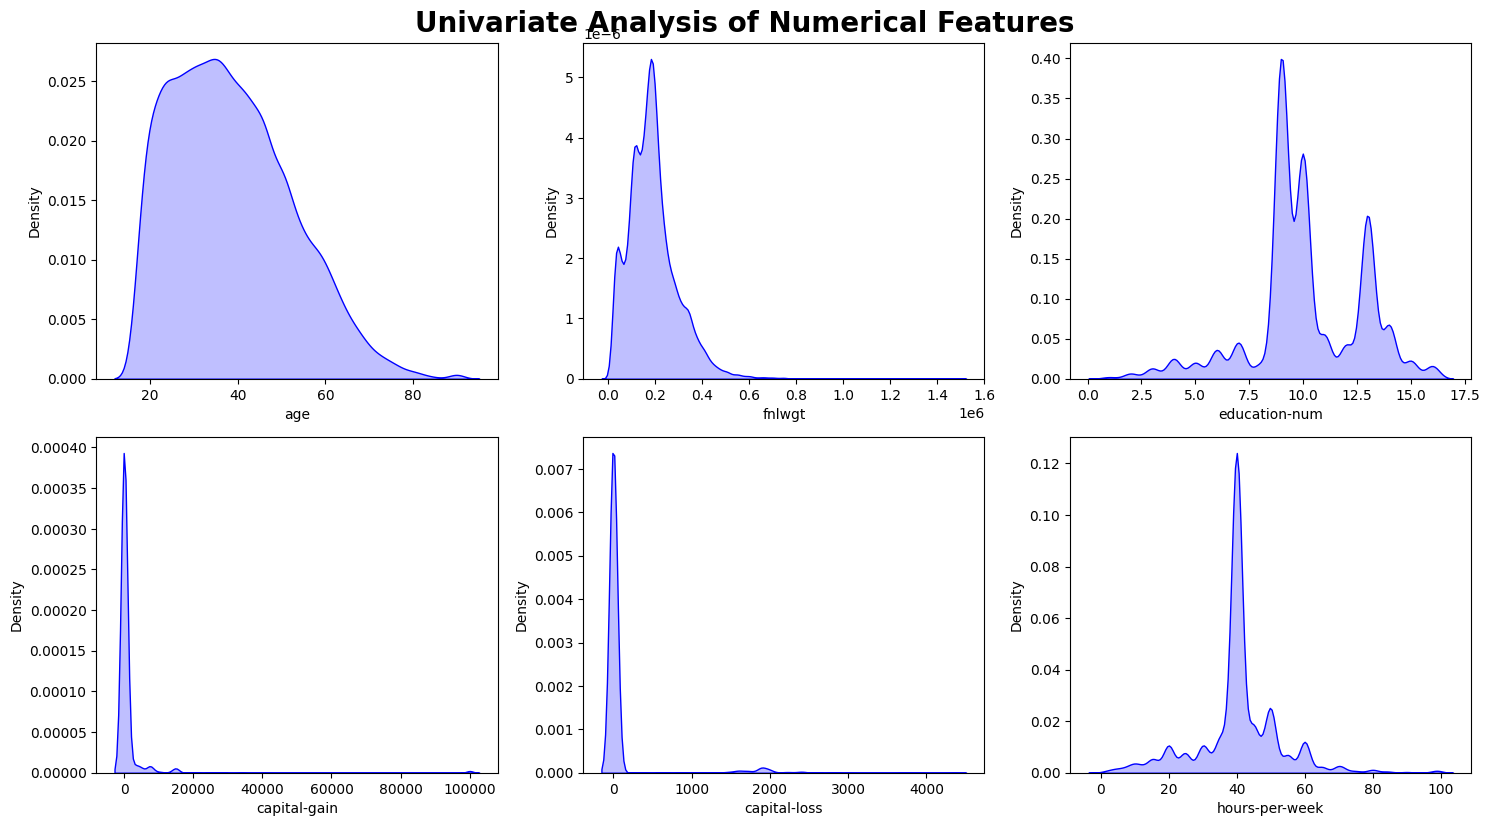

In [8]:
import seaborn as sns
plt.figure(figsize=(15,20))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold')

for i in range(0, len(numerical_features)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df[numerical_features[i]],shade=True, color='b')
    plt.xlabel(numerical_features[i])
    plt.tight_layout()

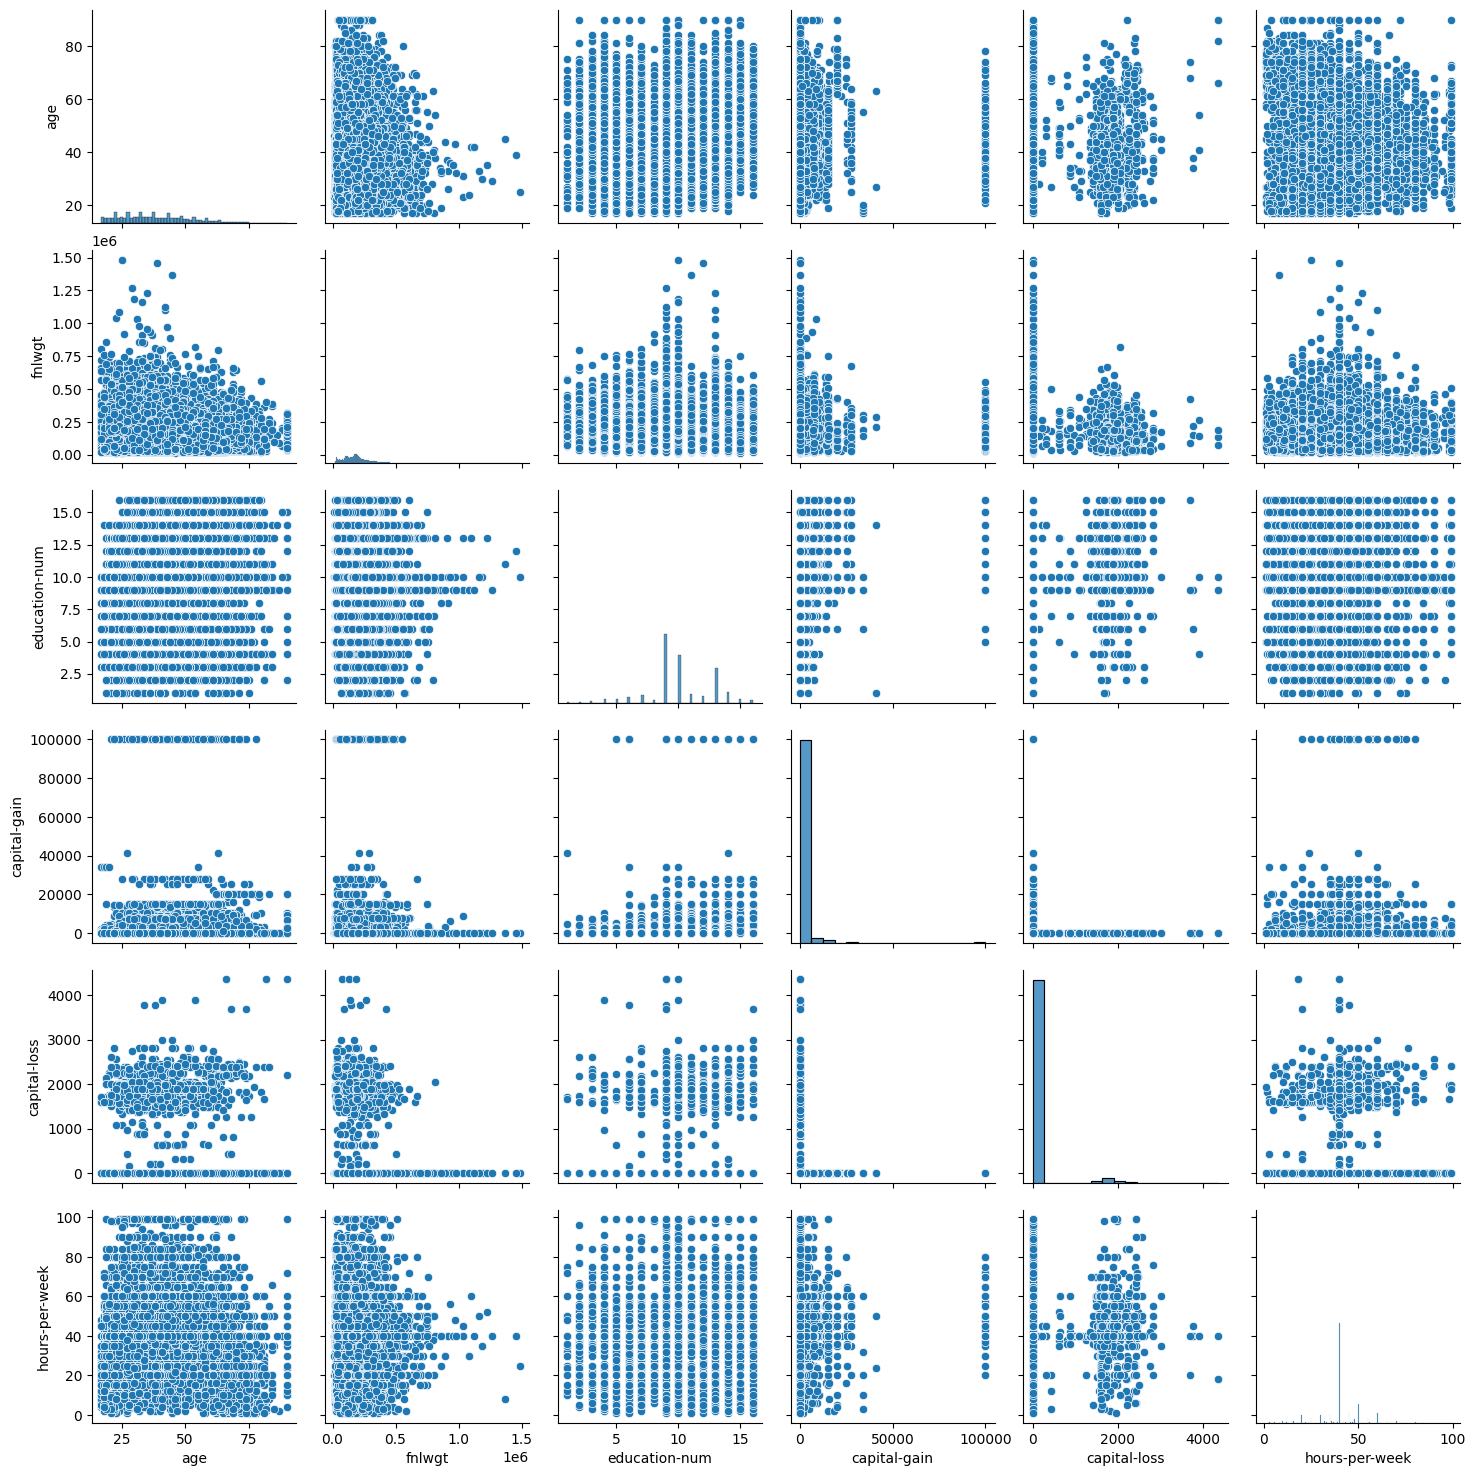

In [9]:
sns.pairplot(df[numerical_features])

['workclass',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'country',
 'salary']

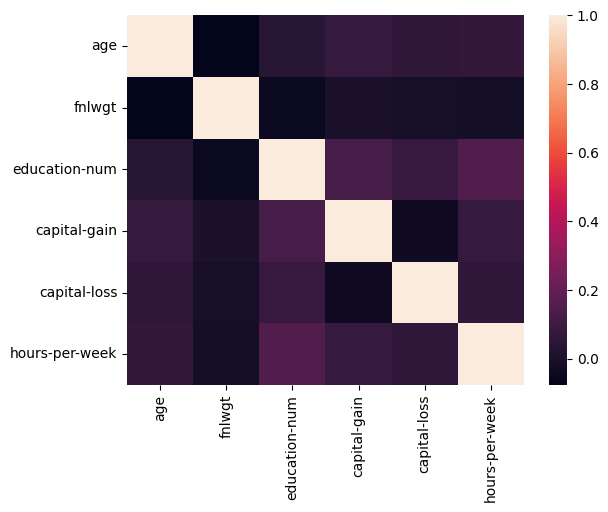

In [10]:
correlation = df[numerical_features].corr()
sns.heatmap(correlation)
categorical_features

In [11]:
# plt.figure(figsize=(20, 15))
# plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold')

# for i in range(0, len(categorical_features)):
#     plt.subplot(5,2 , i+1)
#     sns.countplot(x=df[categorical_features[i]],palette="Set2")
#     plt.xlabel(categorical_features[i])
#     plt.xticks(rotation=45)
#     plt.tight_layout() 

#### checking Normal Distribution using shapriro wick test

In [12]:
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import FunctionTransformer
from scipy.stats import shapiro
shapiro_wick_test = []
for column in numerical_features:
    dataToTest = numerical_df[column]
    stat,p = shapiro(dataToTest)
    if p > 0.05:
        shapiro_wick_test.append("Normally Distributed")
    else:
        shapiro_wick_test.append("Not Normally Distributed")
result = pd.DataFrame(data=[numerical_features ,shapiro_wick_test]).T
result.columns = ['Column Name', 'Shapiro Hypothesis Result']
result

/home/codespace/.local/lib/python3.10/site-packages/scipy/stats/_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Column Name Shapiro Hypothesis Result
0             age  Not Normally Distributed
1          fnlwgt  Not Normally Distributed
2   education_num  Not Normally Distributed
3    capital_gain  Not Normally Distributed
4    capital_loss  Not Normally Distributed
5  hours_per_week  Not Normally Distributed

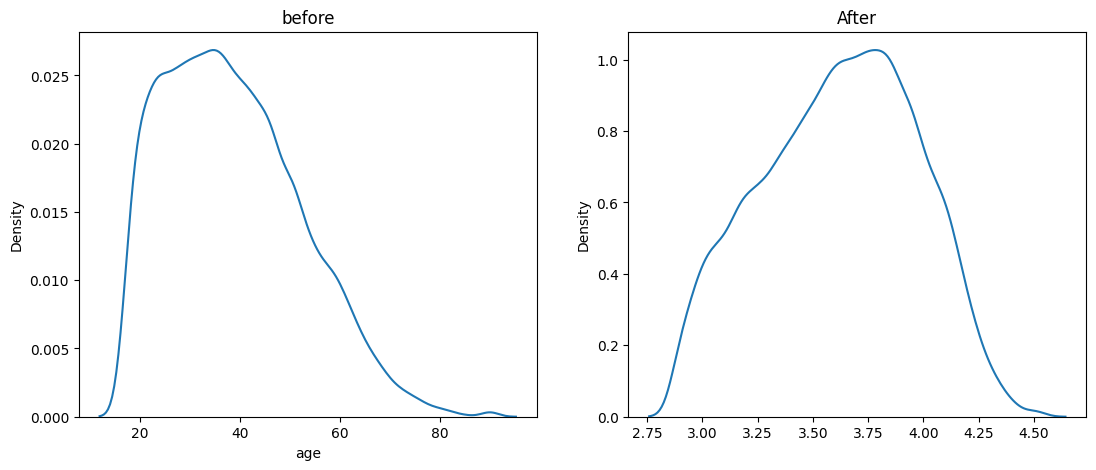

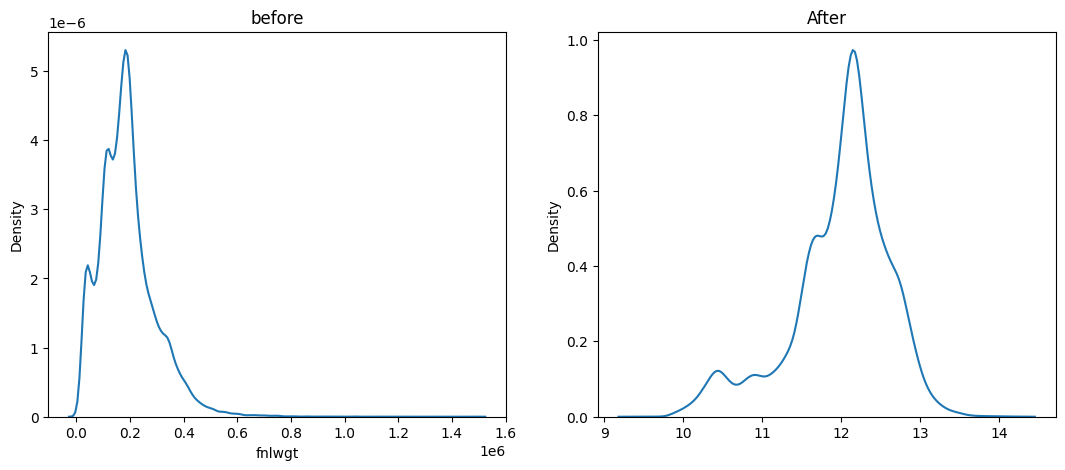

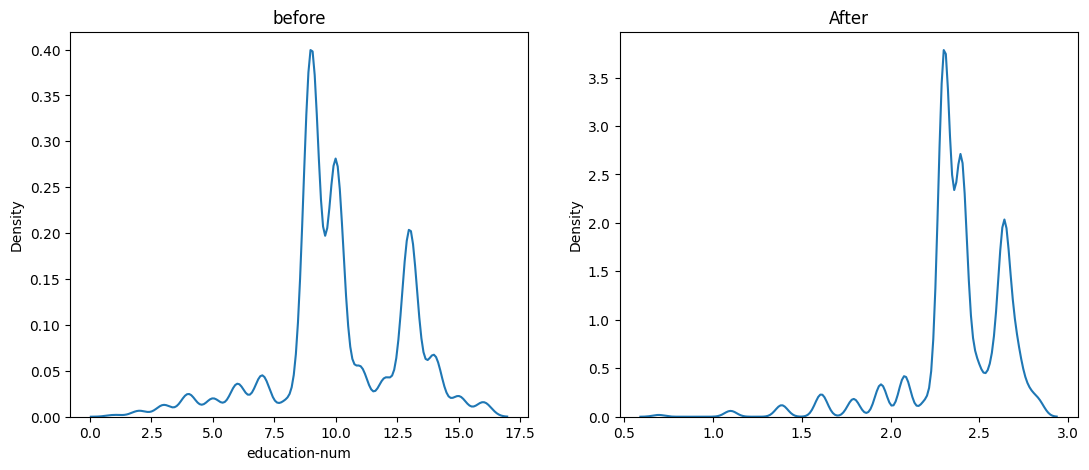

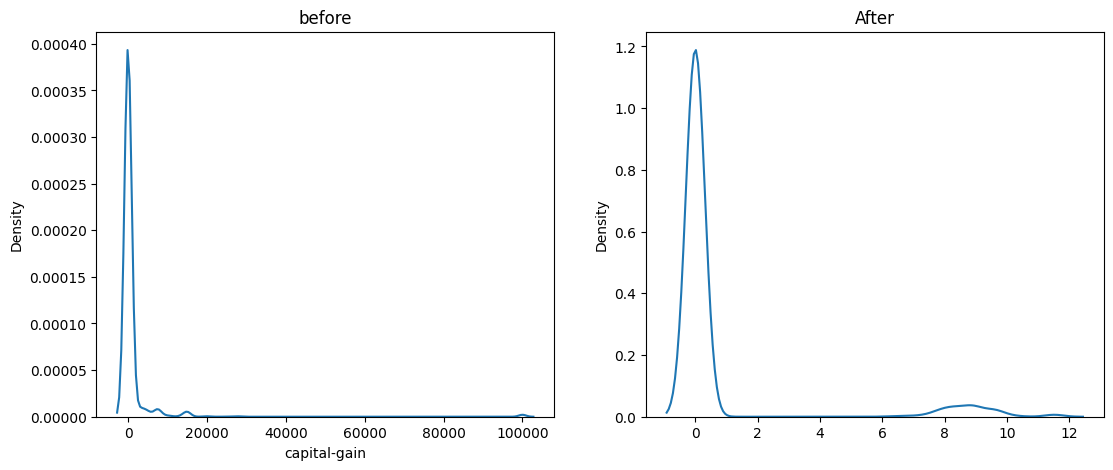

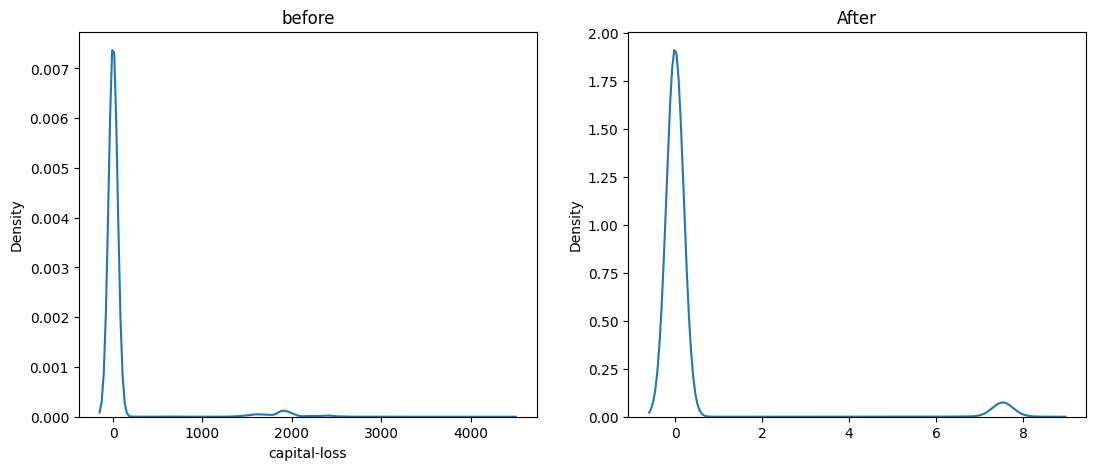

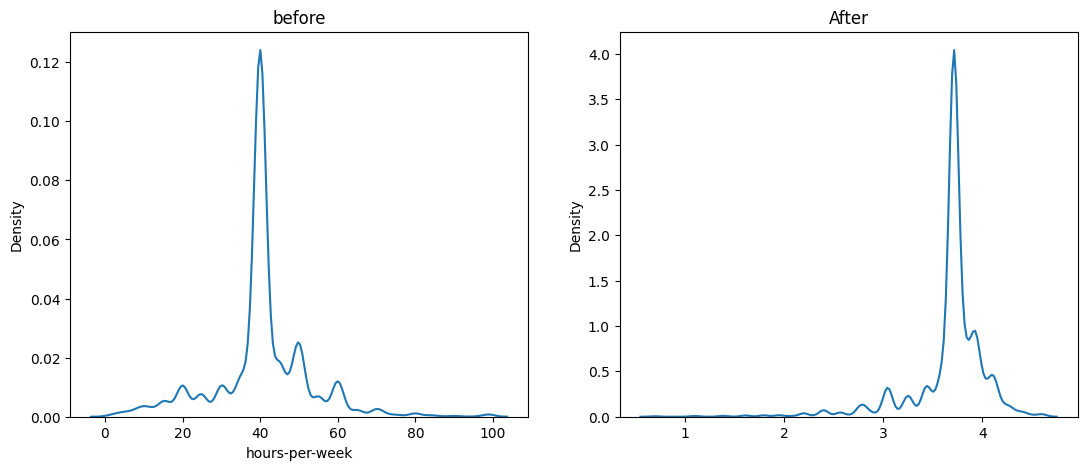

In [13]:
def plots(data,var,transformer):
    plt.figure(figsize=(13,5))
    plt.subplot(121)
    sns.kdeplot(data[var])
    plt.title('before' )
    plt.subplot(122)
    sns.kdeplot(transformer)
    plt.title('After')
log_transformer = FunctionTransformer(np.log1p)
for col in numerical_features:
    X = np.array(df[col])
    Y = log_transformer.transform(X)
    plots(df,col,Y)




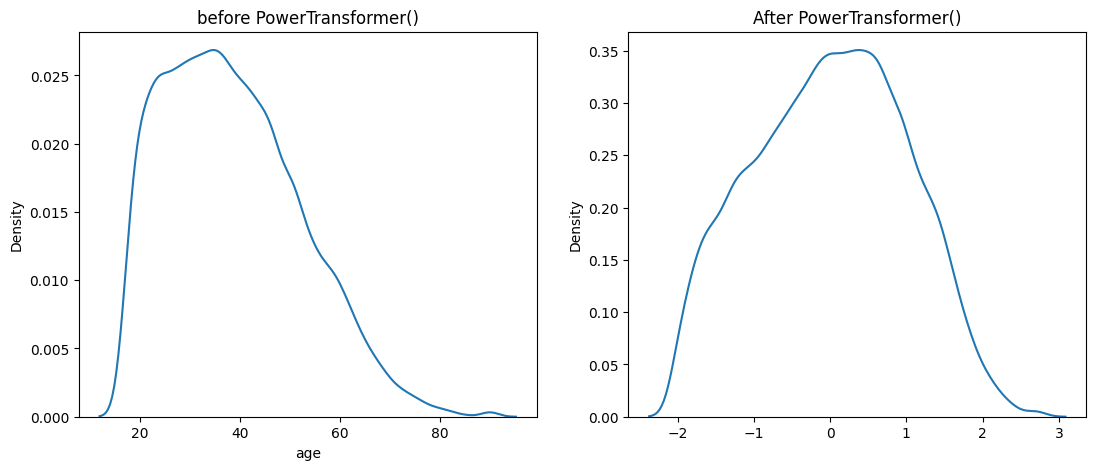

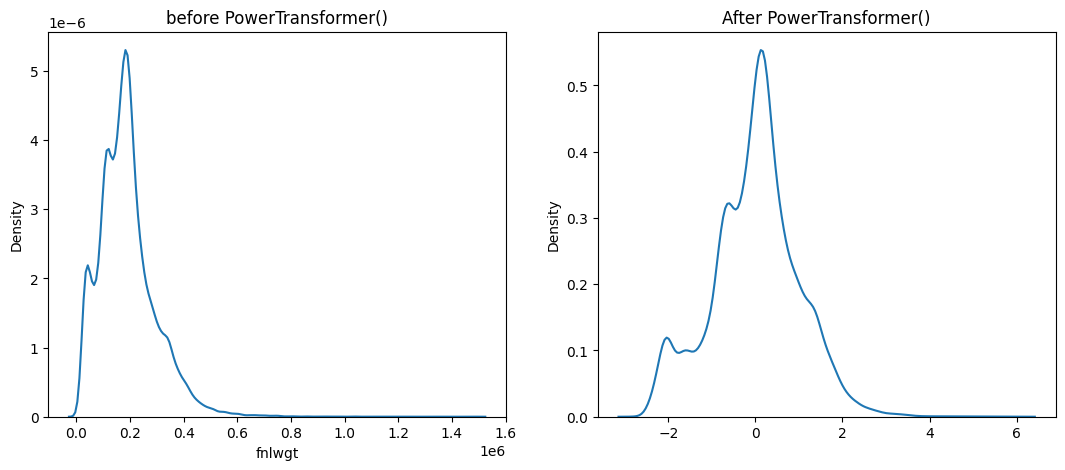

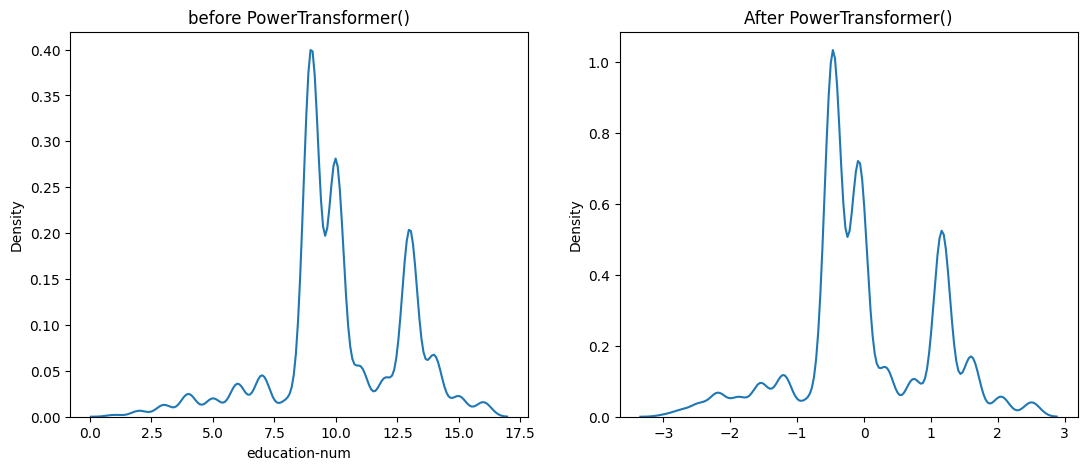

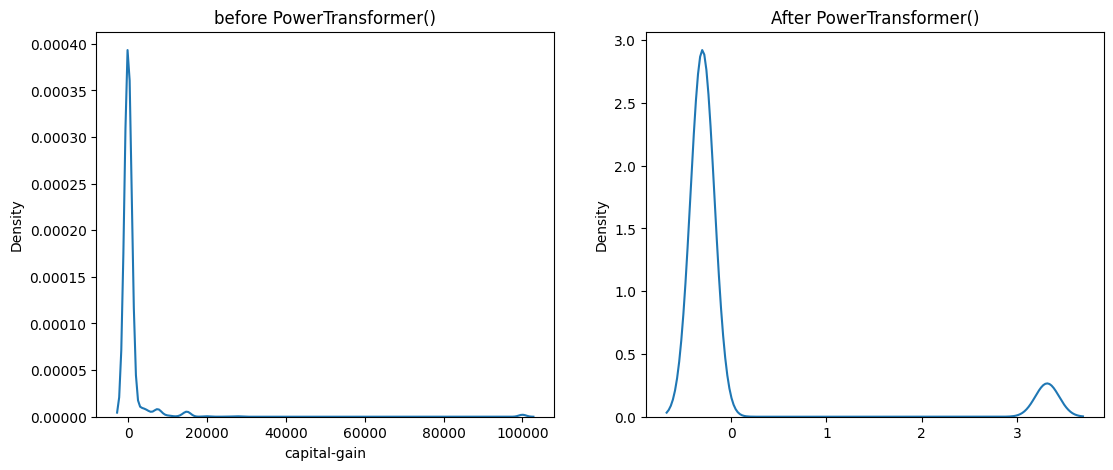

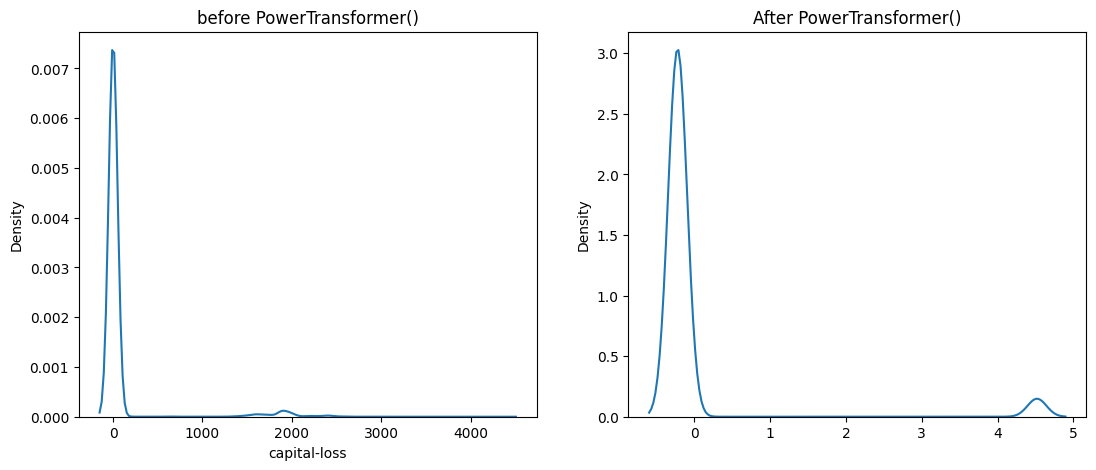

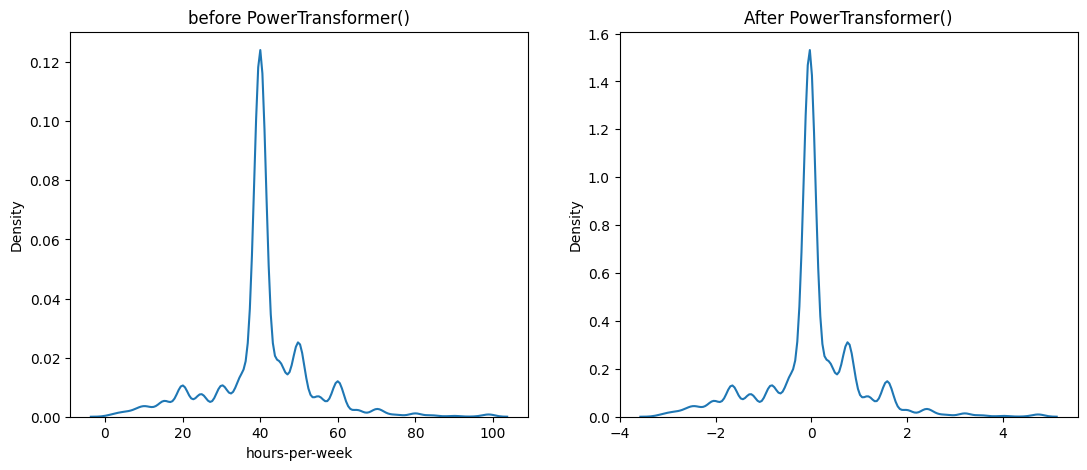

In [14]:
def power_plots(data,var,t):
    plt.figure(figsize=(13,5))
    plt.subplot(121)
    sns.kdeplot(data[var])
    plt.title('before ' + str(t))
    plt.subplot(122)
    p1 = t.fit_transform(data[[var]]).flatten()
    sns.kdeplot(p1)
    plt.title('After ' + str(t))
for col in numerical_features:
    power_plots(df,col,PowerTransformer())

### Outlier Detection
1. Z Score Method

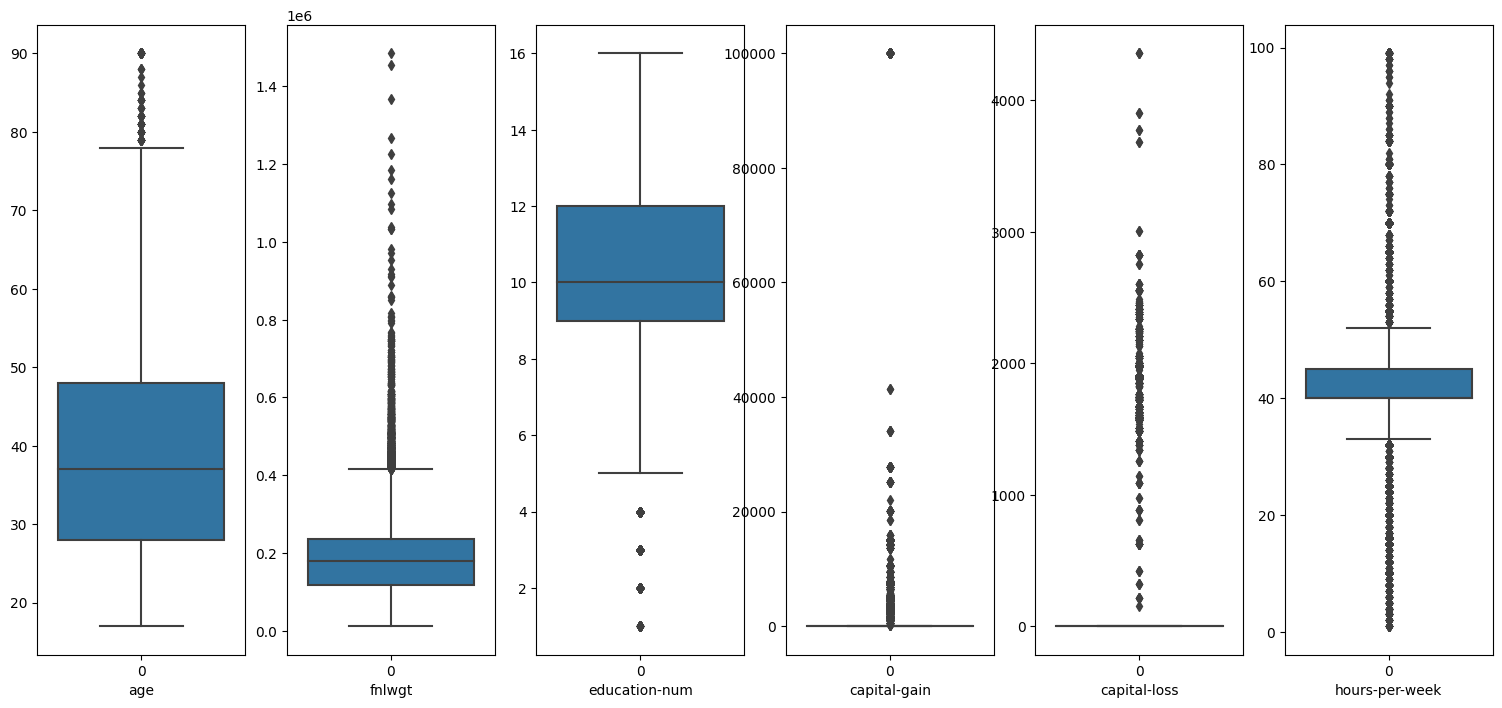

In [15]:
def outlier_thresholds(dataframe, variable):
    quartile1 = dataframe[variable].quantile(0.10)
    quartile3 = dataframe[variable].quantile(0.90)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

plt.figure(figsize=(22,18))
for i,col in enumerate(numerical_df.columns):
    plt.subplot(2,7,i+1)
    sns.boxplot(numerical_df[col])
    plt.xlabel(str(numerical_df.columns[i]))

In [16]:
def replace_with_thresholds(dataframe, numeric_columns):
    for variable in numeric_columns:
        low_limit, up_limit = outlier_thresholds(dataframe, variable)
        dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
        dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit
replace_with_thresholds(numerical_df,numerical_df.columns)

/tmp/ipykernel_12571/1530938293.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
/tmp/ipykernel_12571/1530938293.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit


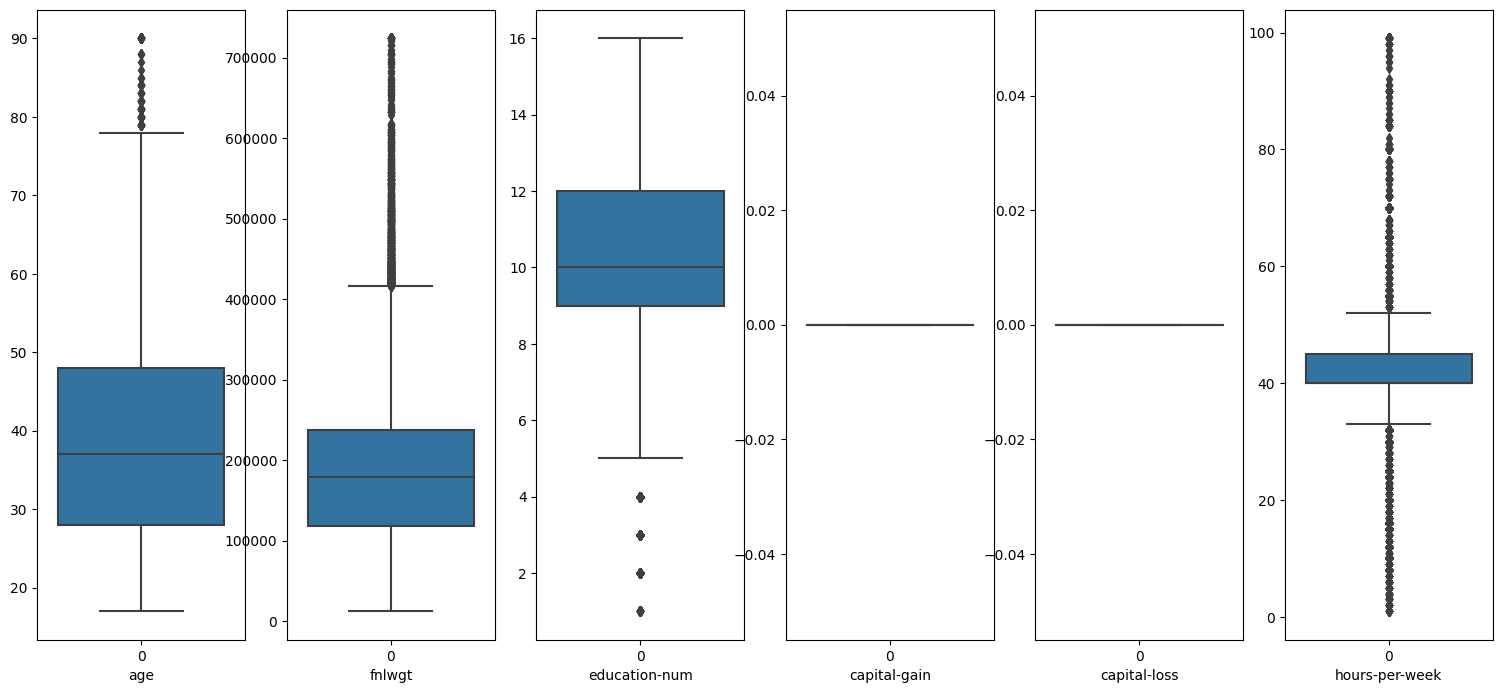

In [17]:
plt.figure(figsize=(22,18))
for i,col in enumerate(numerical_df.columns):
    plt.subplot(2,7,i+1)
    sns.boxplot(numerical_df[col])
    plt.xlabel(str(numerical_df.columns[i]))

2. IQR Method

percentile25 28.0
percentile75 48.0
Upper limit 78.0
Lower limit -2.0


/tmp/ipykernel_12571/416968289.py:21: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[column])
/tmp/ipykernel_12571/416968289.py:27: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1[column])


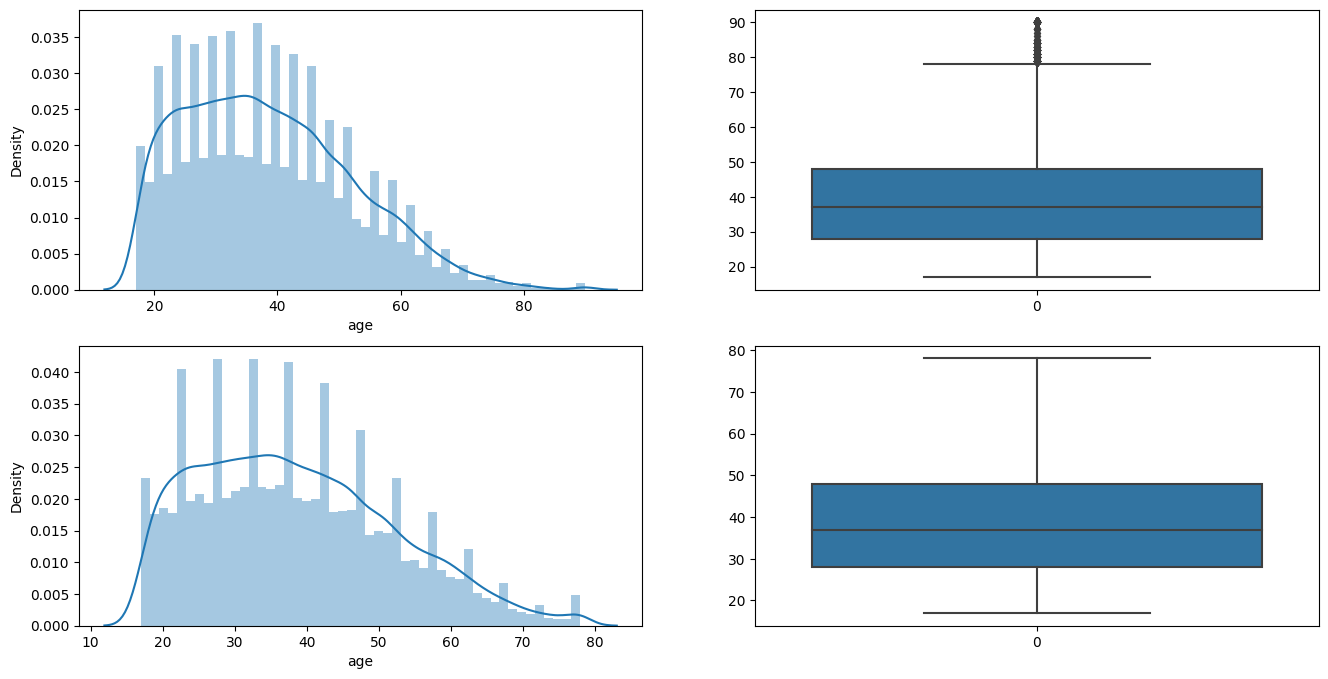

percentile25 117827.0
percentile75 237051.0
Upper limit 415887.0
Lower limit -61009.0


/tmp/ipykernel_12571/416968289.py:21: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[column])
/tmp/ipykernel_12571/416968289.py:27: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1[column])


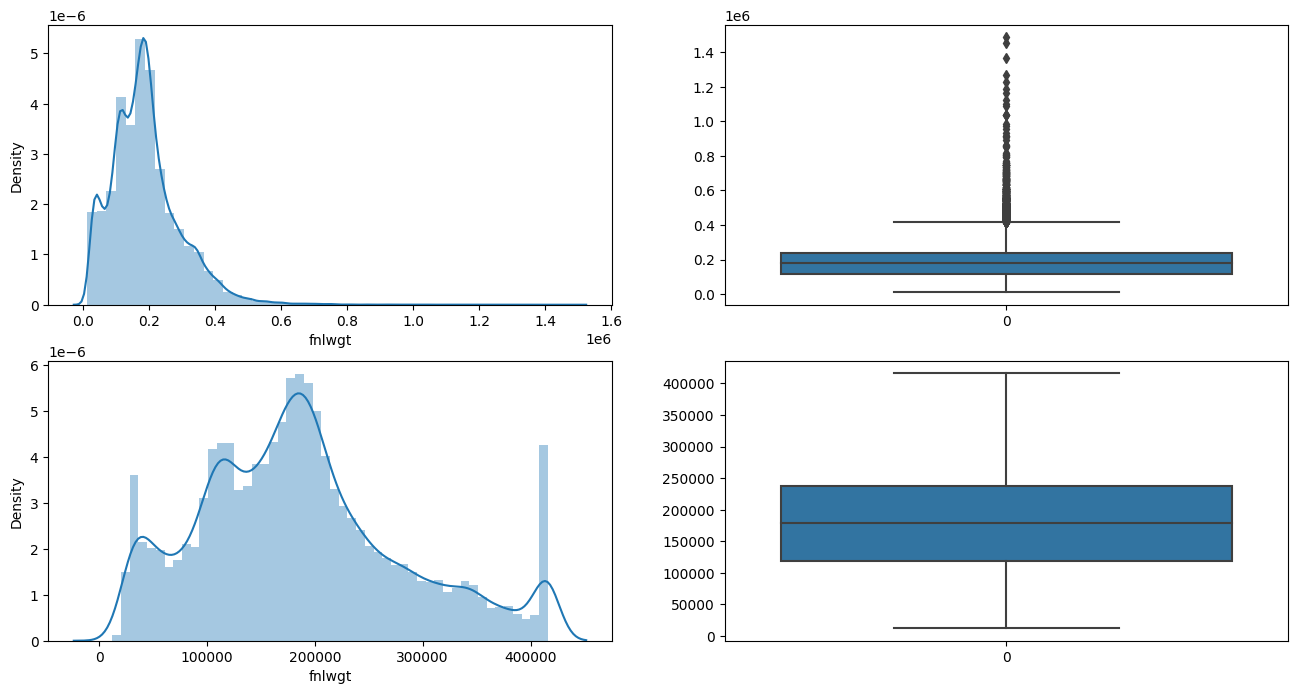

percentile25 9.0
percentile75 12.0
Upper limit 16.5
Lower limit 4.5


/tmp/ipykernel_12571/416968289.py:21: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[column])
/tmp/ipykernel_12571/416968289.py:27: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1[column])


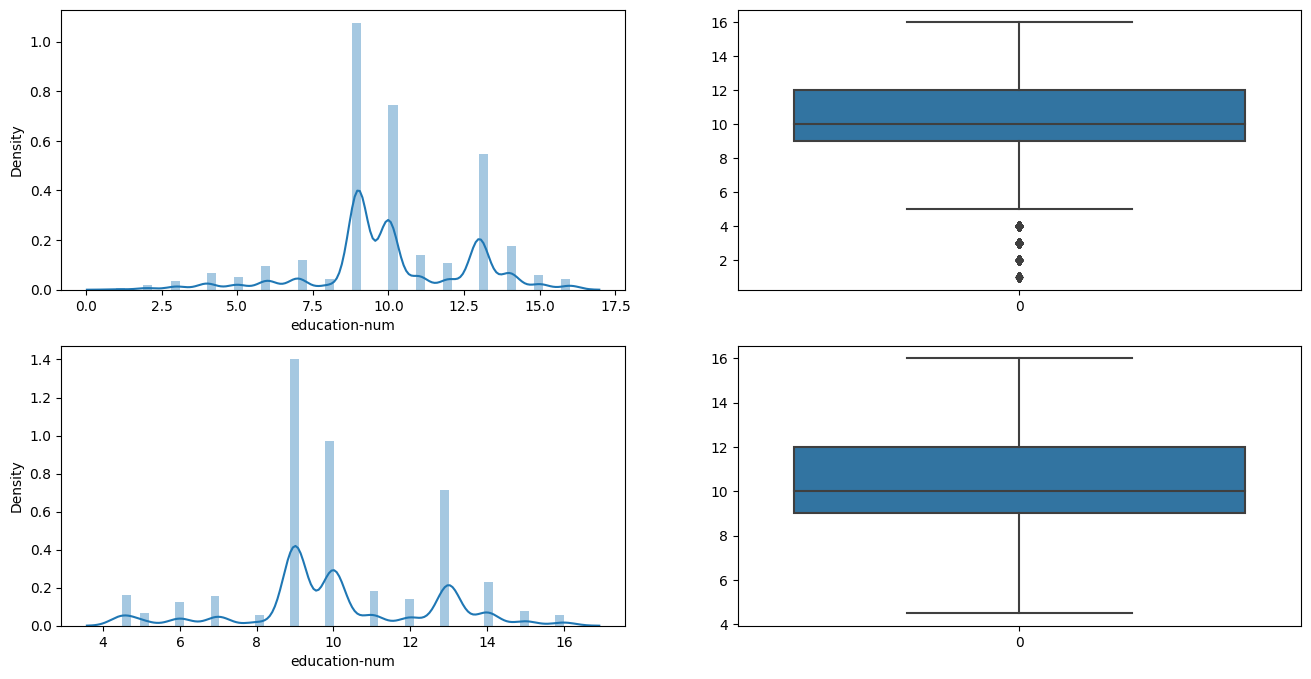

percentile25 0.0
percentile75 0.0
Upper limit 0.0
Lower limit 0.0


/tmp/ipykernel_12571/416968289.py:21: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[column])
/tmp/ipykernel_12571/416968289.py:27: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1[column])
/home/codespace/.local/lib/python3.10/site-packages/seaborn/distributions.py:2511: UserWarning: Datas

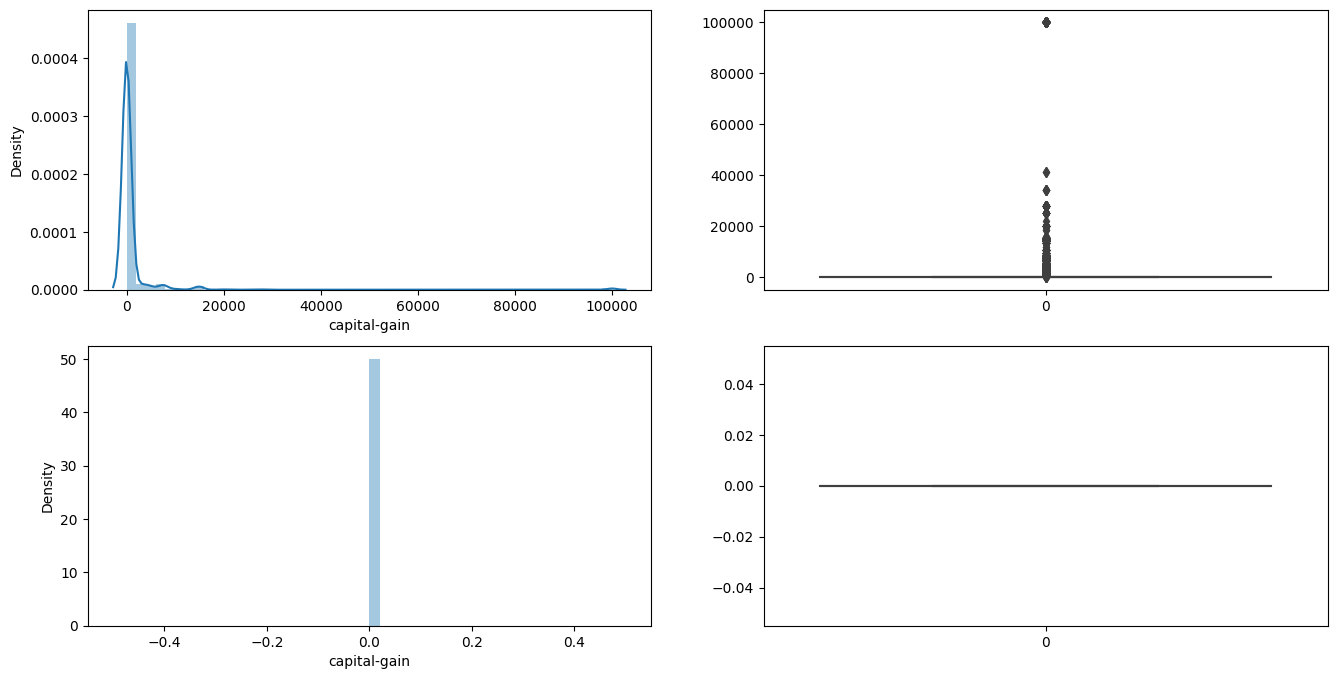

percentile25 0.0
percentile75 0.0
Upper limit 0.0
Lower limit 0.0


/tmp/ipykernel_12571/416968289.py:21: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[column])
/tmp/ipykernel_12571/416968289.py:27: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1[column])
/home/codespace/.local/lib/python3.10/site-packages/seaborn/distributions.py:2511: UserWarning: Datas

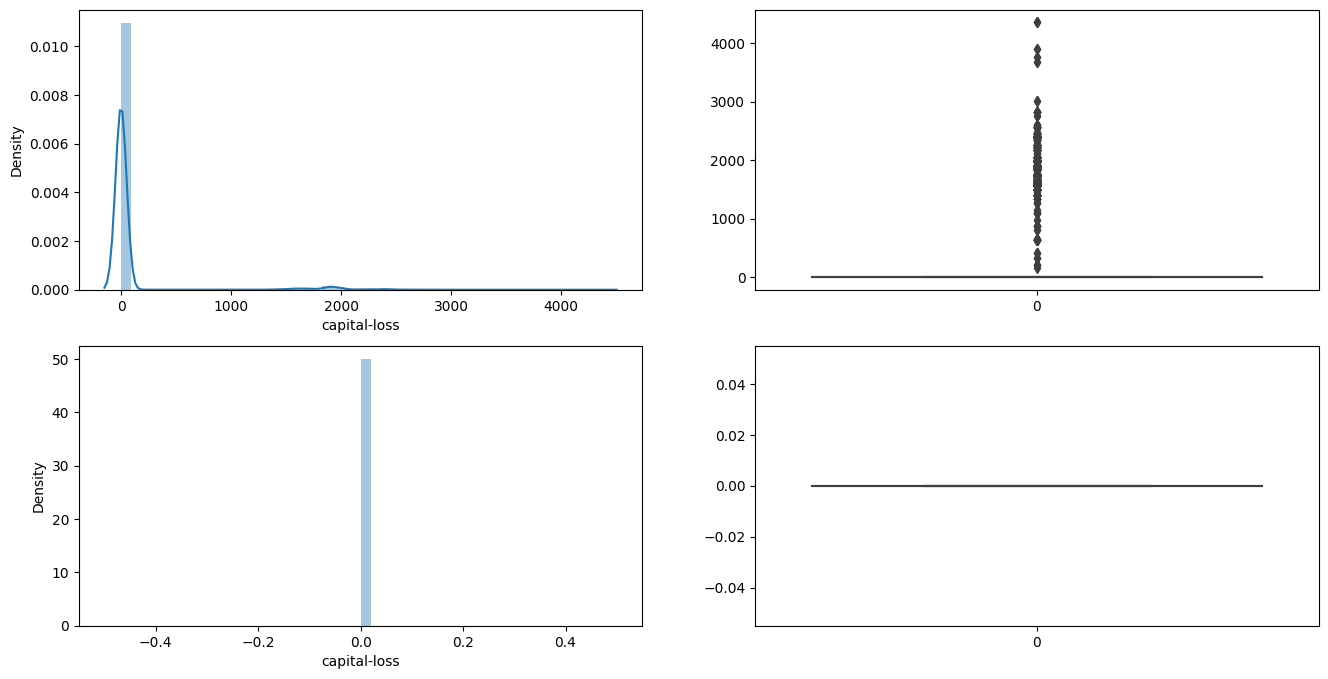

percentile25 40.0
percentile75 45.0
Upper limit 52.5
Lower limit 32.5


/tmp/ipykernel_12571/416968289.py:21: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[column])
/tmp/ipykernel_12571/416968289.py:27: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1[column])


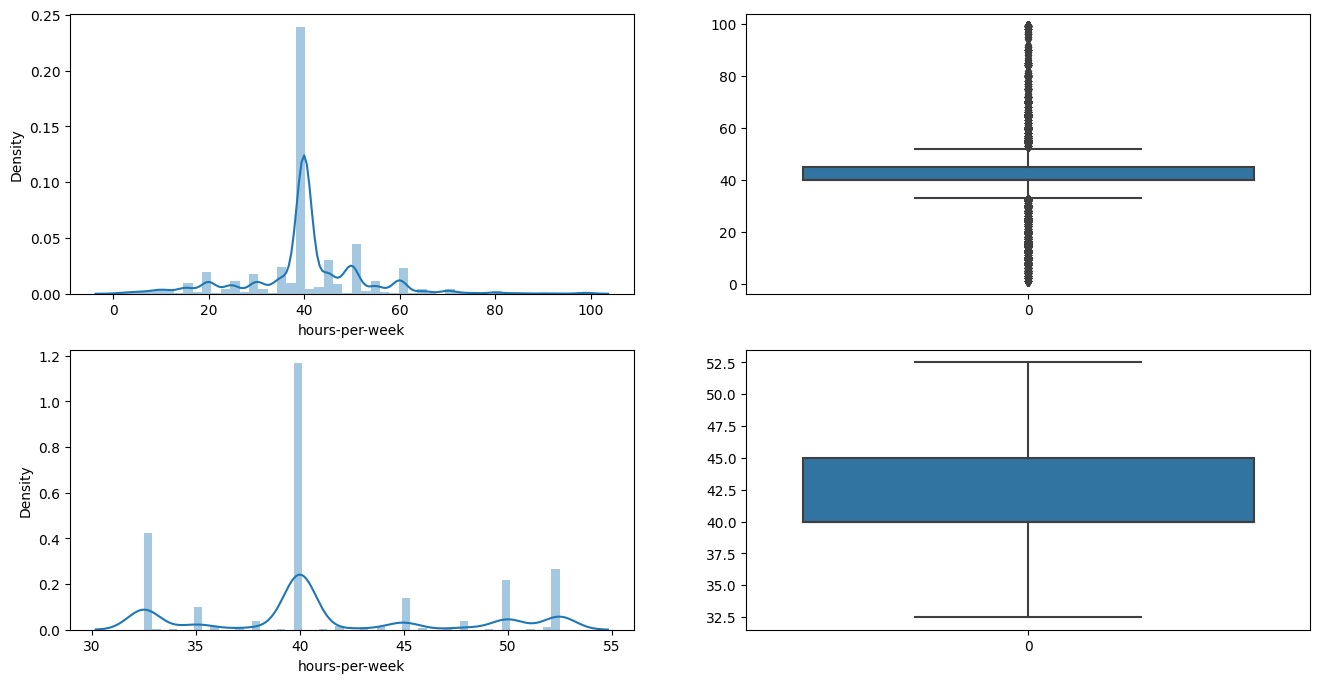

In [18]:
df1 = df.copy()
def remove_outliers_IQR(col):
    # Finding the IQR
    percentile25 = df1[col].quantile(0.25)
    percentile75 = df1[col].quantile(0.75)
    print("percentile25",percentile25)
    print("percentile75",percentile75)
    iqr = percentile75 - percentile25
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr
    print("Upper limit",upper_limit)
    print("Lower limit",lower_limit)
    df1[col] = np.where(df1[col]>upper_limit, upper_limit, np.where(df1[col]<lower_limit,lower_limit,df1[col]))
    return df1[df1[col] > upper_limit]


def create_comparison_plot(data,df1,column):
    # Comparing
    plt.figure(figsize=(16,8))
    plt.subplot(2,2,1)
    sns.distplot(data[column])

    plt.subplot(2,2,2)
    sns.boxplot(data[column])

    plt.subplot(2,2,3)
    sns.distplot(df1[column])

    plt.subplot(2,2,4)
    sns.boxplot(df1[column])

    plt.show()

for features in numerical_df.columns:
    remove_outliers_IQR(features)
    create_comparison_plot(df,df1,features)


In [21]:
from adult.entity.artifact_entity import DataIngestionArtifact, DataTransformationArtifact, DataValidationArtifact
from adult.entity.config_entity import DataTransformationConfig
import numpy as np
import pandas as pd
from adult.constant import *
from adult.util.util import read_yaml_file, load_data, save_numpy_array_data, save_object
from adult.logger import logging
from adult.exception import AdultException
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
import os,sys
schema_path = "/workspaces/AdultCensusIncome/config/schema.yaml"
train_file_path = "/workspaces/AdultCensusIncome/adult/artifact/data_ingestion/2022-12-15-11-48-55/ingested_data/train/adult.csv"
test_file_path = "/workspaces/AdultCensusIncome/adult/artifact/data_ingestion/2022-12-15-11-48-55/ingested_data/test/adult.csv"


def get_transformed_object()->ColumnTransformer:
    schema_data = "/workspaces/AdultCensusIncome/config/schema.yaml"
    data_schema = read_yaml_file(schema_data)

    num_cols = data_schema[SCHEMA_NUMERICAL_COLUMNS]
    cat_cols = data_schema[SCHEMA_CATEGORICAL_COLUMNS]
    age_col = num_cols.index('age')
    fnlwgt_col = num_cols.index('fnlwgt')
    education_num_col = num_cols.index('education_num') 
    hours_per_week_col = num_cols.index('hours_per_week')

    num_pipeline = make_pipeline(SimpleImputer(missing_values=np.nan, strategy="mean") ,StandardScaler() )
    cat_pipeline = make_pipeline(SimpleImputer(missing_values=np.nan, strategy="most_frequent"), OneHotEncoder(sparse=False,handle_unknown='ignore'), StandardScaler(with_mean=False))
    

    logging.info(f"Numerical Columns are {num_cols}")
    logging.info(f"Categorical Columns are {cat_cols}")
    preprocessing = ColumnTransformer([("num_pipeline", num_pipeline, num_cols),
                                        ("cat_cols", cat_pipeline, cat_cols),])
    return preprocessing
lol = get_transformed_object()

train_df = load_data(file_path = train_file_path, schema_file_path=schema_path)
test_df = load_data(file_path=test_file_path,schema_file_path=schema_path)
schema = read_yaml_file(schema_path)
target_column = schema[SCHEMA_TARGET_COLUMN]


def remove_outliers_IQR_train(col):
    # Finding the IQR
    percentile25 = train_df[col].quantile(0.25)
    percentile75 = train_df[col].quantile(0.75)
    print("percentile25",percentile25)
    print("percentile75",percentile75)
    iqr = percentile75 - percentile25
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr
    print("Upper limit",upper_limit)
    print("Lower limit",lower_limit)
    train_df[col] = np.where(train_df[col]>upper_limit, upper_limit, np.where(train_df[col]<lower_limit,lower_limit,train_df[col]))
    return train_df[train_df[col] > upper_limit]

def remove_outliers_IQR_test(col):
    # Finding the IQR
    percentile25 = test_df[col].quantile(0.25)
    percentile75 = test_df[col].quantile(0.75)
    print("percentile25",percentile25)
    print("percentile75",percentile75)
    iqr = percentile75 - percentile25
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr
    print("Upper limit",upper_limit)
    print("Lower limit",lower_limit)
    test_df[col] = np.where(test_df[col]>upper_limit, upper_limit, np.where(test_df[col]<lower_limit,lower_limit,test_df[col]))
    return test_df[test_df[col] > upper_limit]

remove_outliers_IQR_train('age')
remove_outliers_IQR_train('fnlwgt')
remove_outliers_IQR_train('education_num')
remove_outliers_IQR_train('hours_per_week')

remove_outliers_IQR_test('age')
remove_outliers_IQR_test('fnlwgt')
remove_outliers_IQR_test('education_num')
remove_outliers_IQR_test('hours_per_week')

input_feature_train_df = train_df.drop(columns=[target_column],axis=1)
target_feature_train_df = train_df[target_column]

input_feature_test_df = test_df.drop(columns=[target_column],axis=1)
target_feature_test_df = test_df[target_column]





input_feature_train_arr = lol.fit_transform(input_feature_train_df)
input_feature_test_arr = lol.transform(input_feature_test_df)
label = LabelEncoder()
target_feature_train_arr = label.fit_transform(target_feature_train_df)
target_feature_test_arr = label.transform(target_feature_test_df)

target_feature_test_arr

percentile25 28.0
percentile75 48.0
Upper limit 78.0
Lower limit -2.0
percentile25 117831.5
percentile75 236428.5
Upper limit 414324.0
Lower limit -60064.0
percentile25 9.0
percentile75 12.0
Upper limit 16.5
Lower limit 4.5
percentile25 40.0
percentile75 45.0
Upper limit 52.5
Lower limit 32.5
percentile25 28.0
percentile75 47.0
Upper limit 75.5
Lower limit -0.5
percentile25 117802.0
percentile75 239539.0
Upper limit 422144.5
Lower limit -64803.5
percentile25 9.0
percentile75 12.0
Upper limit 16.5
Lower limit 4.5
percentile25 40.0
percentile75 45.0
Upper limit 52.5
Lower limit 32.5


/home/codespace/.local/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([0, 0, 0, ..., 0, 0, 0])

>>>>>>>>>>>>>>>>>>>>Results for Classifier RandomForestClassifier() <<<<<<<<<<<<<<<<<<<<
Precision score of this classification is 0.7342091965639211
accuracy score of this classification is 0.8541304125294298
0 is <=50K and 1 is >50K


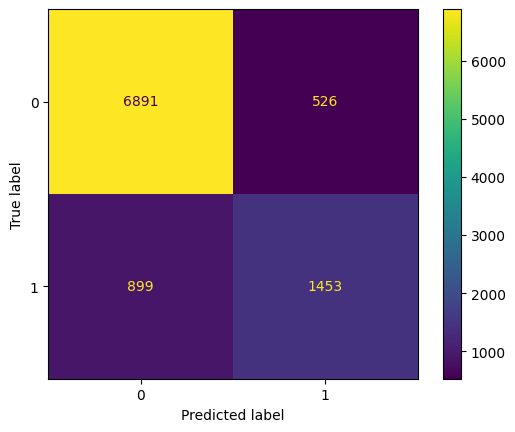

>>>>>>>>>>>>>>>>>>>>Results for Classifier DecisionTreeClassifier() <<<<<<<<<<<<<<<<<<<<
Precision score of this classification is 0.6173553719008265
accuracy score of this classification is 0.8173815129491248
0 is <=50K and 1 is >50K


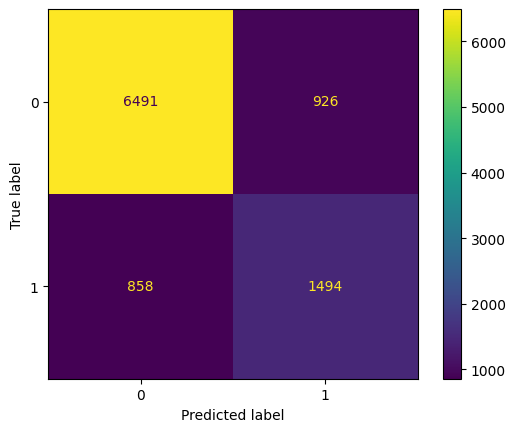

>>>>>>>>>>>>>>>>>>>>Results for Classifier SVC() <<<<<<<<<<<<<<<<<<<<
Precision score of this classification is 0.7356385945343
accuracy score of this classification is 0.8457365134609479
0 is <=50K and 1 is >50K


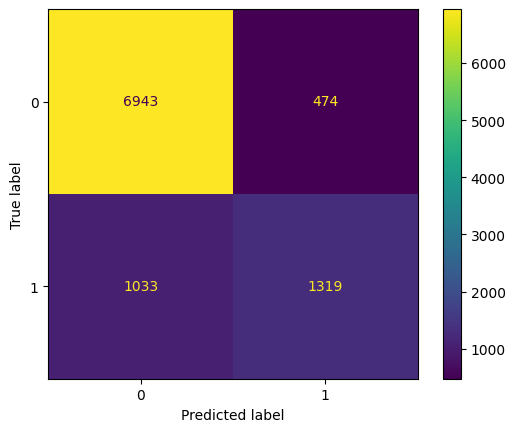

>>>>>>>>>>>>>>>>>>>>Results for Classifier LogisticRegression() <<<<<<<<<<<<<<<<<<<<


/home/codespace/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Precision score of this classification is 0.7312335958005249
accuracy score of this classification is 0.8494216398812571
0 is <=50K and 1 is >50K


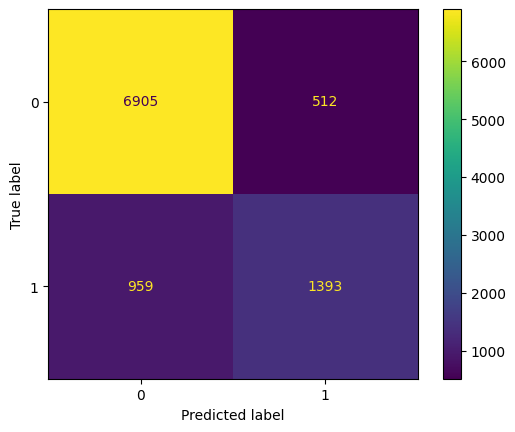

>>>>>>>>>>>>>>>>>>>>Results for Classifier GaussianNB() <<<<<<<<<<<<<<<<<<<<
Precision score of this classification is 0.2981561396626128
accuracy score of this classification is 0.44323881666496057
0 is <=50K and 1 is >50K


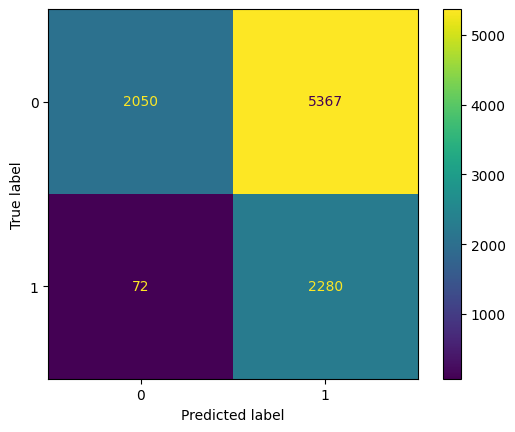

>>>>>>>>>>>>>>>>>>>>Results for Classifier KNeighborsClassifier() <<<<<<<<<<<<<<<<<<<<
Precision score of this classification is 0.6438020578147967
accuracy score of this classification is 0.8193264407820657
0 is <=50K and 1 is >50K


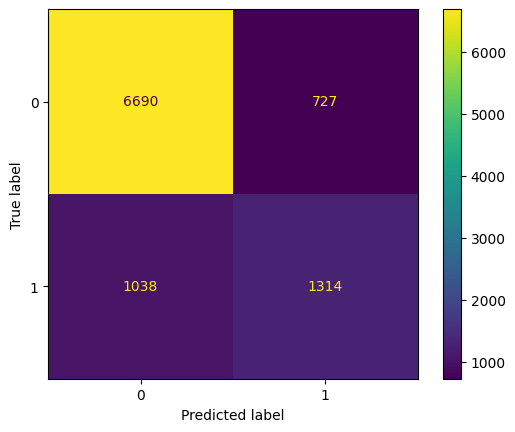

>>>>>>>>>>>>>>>>>>>>Results for Classifier XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...) <<<<<<<<<<<<<<<<<<<<
Precision score of this classification is 0.771414342629482
accuracy score of this classification is 0.8708158460436073
0 is <=50K and 1 is >50K


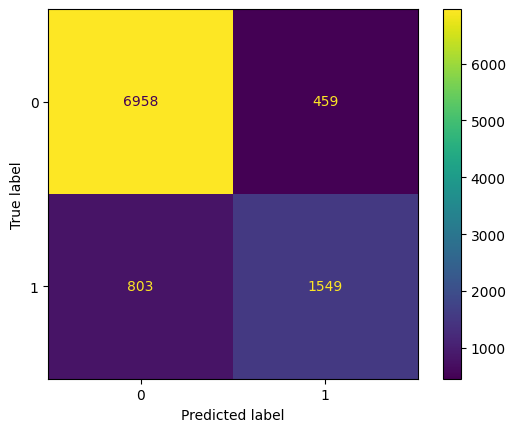

>>>>>>>>>>>>>>>>>>>>Results for Classifier XGBRFClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bytree=None,
                early_stopping_rounds=None, enable_categorical=False,
                eval_metric=None, feature_types=None, gamma=None, gpu_id=None,
                grow_policy=None, importance_type=None,
                interaction_constraints=None, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=None, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                n_estimators=100, n_jobs=None, num_parallel_tree=None,
                objective='binary:logistic', predictor=None, random_state=None,
                reg_alpha=None, ...) <<<<<<<<<<<<<<<<<<<<
Precision score of this classification is 0.793873643905552
accuracy score of this classification is 0.8535162247927116
0 is <=50K and 1 is >50K

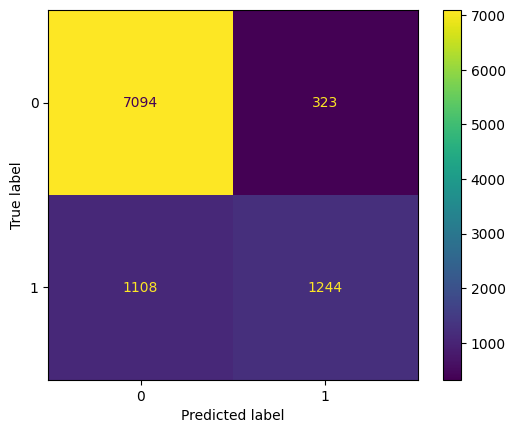

In [23]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import  LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from xgboost import XGBRFClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, precision_score, confusion_matrix, ConfusionMatrixDisplay
RFestimator = RandomForestRegressor()
RFClassifier = RandomForestClassifier()
DTClassifier = DecisionTreeClassifier()
Support_Vec_Classifier = SVC()
Logistic_Regressor = LogisticRegression()
Gaussian_Naive_Bayes = GaussianNB()
K_Neighbors_Classifier = KNeighborsClassifier()
xgb_model = xgb.XGBClassifier(objective="binary:logistic")
xgbRF = xgb.XGBRFClassifier()

# params = {'n_estimators':[110, 120, 150, 180, 200], 'min_samples_split':[3,5,7,8], 'max_features': [2,3]}
# RFRegression = GridSearchCV(estimator = RFestimator, param_grid = params)

# RFClassifier.fit(input_feature_train_arr, target_feature_train_arr)
# pred = RFClassifier.predict(input_feature_test_arr)
# print(f"Precision score of this classification is {precision_score(target_feature_test_arr, pred)}")
# print(f"accuracy score of this classification is {accuracy_score(target_feature_test_arr, pred)}")
# print("0 is <=50K and 1 is >50K")
# disp = ConfusionMatrixDisplay(confusion_matrix(target_feature_test_arr, pred, labels = RFClassifier.classes_), display_labels = RFClassifier.classes_)
def Classification_func(func):
    print(f"{'>>'*10}Results for Classifier {str(func)} {'<<'*10}")
    func.fit(input_feature_train_arr, target_feature_train_arr)
    pred = func.predict(input_feature_test_arr)
    print(f"Precision score of this classification is {precision_score(target_feature_test_arr, pred)}")
    print(f"accuracy score of this classification is {accuracy_score(target_feature_test_arr, pred)}")
    print("0 is <=50K and 1 is >50K")
    disp = ConfusionMatrixDisplay(confusion_matrix(target_feature_test_arr, pred, labels = func.classes_), display_labels = func.classes_)
    disp.plot()
    plt.show()

Classification_func(RFClassifier)
Classification_func(DTClassifier)
Classification_func(Support_Vec_Classifier)
Classification_func(Logistic_Regressor)
Classification_func(Gaussian_Naive_Bayes)
Classification_func(K_Neighbors_Classifier)
Classification_func(xgb_model)
Classification_func(xgbRF)


In [ ]:
schema_path = "/workspaces/adultCensus/config/schema.yaml"
data_schema = read_yaml_file(schema_path)
num_cols = data_schema[SCHEMA_NUMERICAL_COLUMNS]
age = num_cols.index('age')
print(num_cols[age])

age


/tmp/ipykernel_5400/2405656655.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[column])
/tmp/ipykernel_5400/2405656655.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1[column])


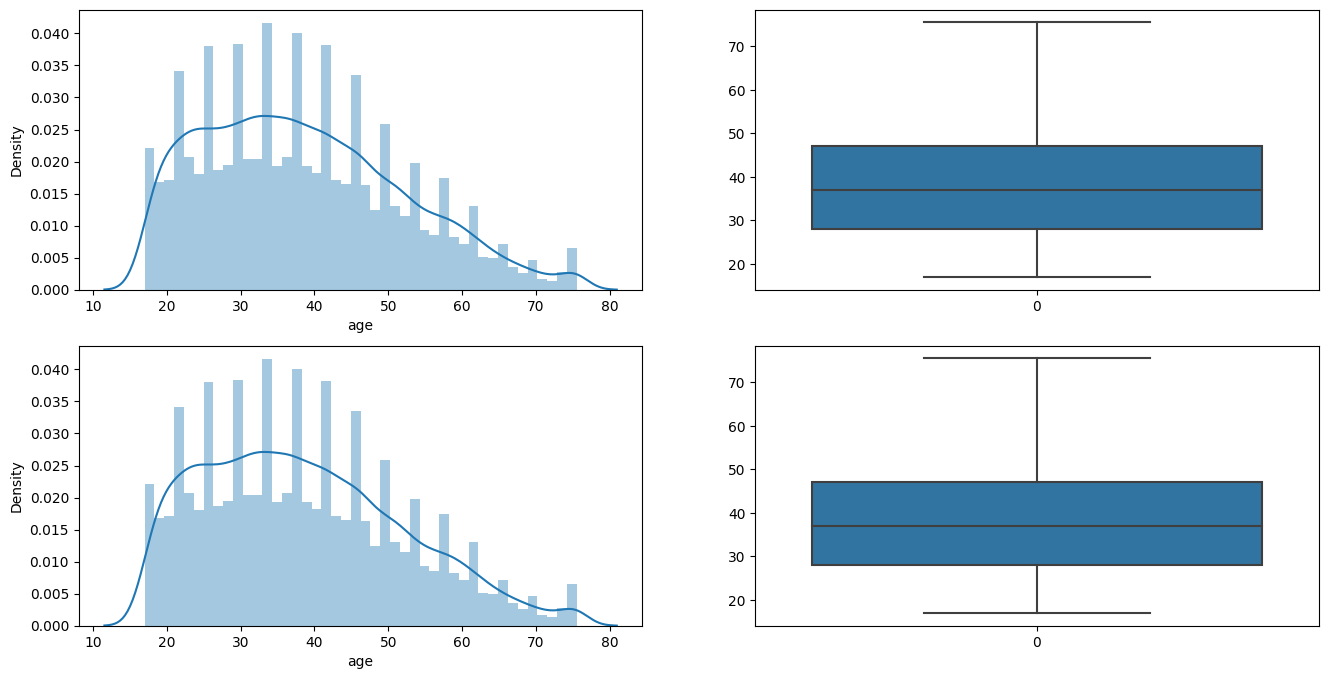

: 

In [ ]:
def create_comparison_plot(data,df1,column):
    # Comparing
    plt.figure(figsize=(16,8))
    plt.subplot(2,2,1)
    sns.distplot(data[column])

    plt.subplot(2,2,2)
    sns.boxplot(data[column])

    plt.subplot(2,2,3)
    sns.distplot(df1[column])

    plt.subplot(2,2,4)
    sns.boxplot(df1[column])

    plt.show()

create_comparison_plot(input_feature_train_df, input_feature_train_df, column = 'age')